In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kids_data=pd.read_csv("Indian_Kids_Screen_Time.csv")

In [3]:
kids_data

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


In [4]:
kids_data.shape

(9712, 8)

In [5]:
kids_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [11]:
kids_data.isna().any(axis=0).sum()

np.int64(1)

In [12]:
kids_data.value_counts("Age")

Age
17    919
8     912
13    910
14    896
9     885
10    877
16    876
12    867
11    866
15    864
18    840
Name: count, dtype: int64

In [13]:
def age_group(age):
    if age>0 and age <=5:
        return "0 to 5 year"
    elif age>5 and age<=10:
        return "6 to 10 year"
    elif age>10 and age<=15:
        return "11 to 15 year"
    else:
        return "above 15 year"

In [15]:
kids_data["Age Group"]=kids_data["Age"].apply(age_group)
kids_data

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age Group
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,11 to 15 year
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,11 to 15 year
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,above 15 year
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,11 to 15 year
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,11 to 15 year
...,...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban,above 15 year
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural,above 15 year
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural,above 15 year
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban,above 15 year


In [16]:
kids_data.value_counts("Age Group")

Age Group
11 to 15 year    4403
6 to 10 year     2674
above 15 year    2635
Name: count, dtype: int64

In [18]:
groupwise_screen_time=kids_data.groupby("Age Group")["Avg_Daily_Screen_Time_hr"].mean().reset_index(name="Average Daily Screen Time")
groupwise_screen_time

,Age Group,Average Daily Screen Time
0,11 to 15 year,4.501944
1,6 to 10 year,3.925049
2,above 15 year,4.537803


In [19]:
screentime_by_gender=kids_data.groupby("Gender")["Avg_Daily_Screen_Time_hr"].mean().reset_index(name="Average Daily Screen Time")
screentime_by_gender

,Gender,Average Daily Screen Time
0,Female,4.327021
1,Male,4.377754


In [20]:
screentime_by_locality=kids_data.groupby("Urban_or_Rural")["Avg_Daily_Screen_Time_hr"].mean().reset_index(name="Average Daily Screen Time")
screentime_by_locality

,Urban_or_Rural,Average Daily Screen Time
0,Rural,4.373702
1,Urban,4.344123


In [21]:
kids_data.value_counts("Primary_Device")

Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64

In [22]:
kids_high_screentime=kids_data[kids_data["Avg_Daily_Screen_Time_hr"]>4]
kids_high_screentime

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age Group
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,11 to 15 year
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,11 to 15 year
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,11 to 15 year
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,11 to 15 year
11,15,Female,4.94,TV,True,0.36,Poor Sleep,Rural,11 to 15 year
...,...,...,...,...,...,...,...,...,...
9706,8,Male,4.84,Smartphone,True,0.55,NaN,Rural,6 to 10 year
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural,above 15 year
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural,above 15 year
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban,above 15 year


In [24]:
print(f"No of kids with more than 4hr daily screentime: {kids_high_screentime.shape[0]}")

No of kids with more than 4hr daily screentime: 5950


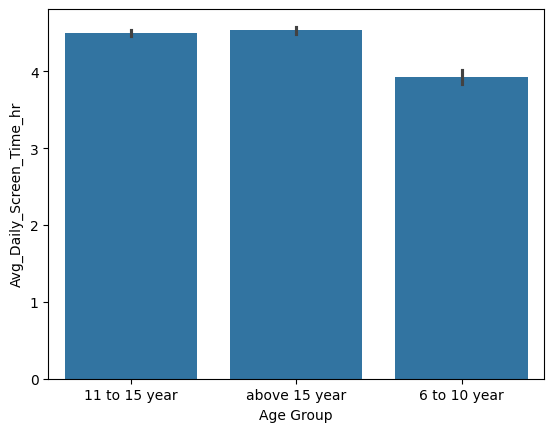

In [ ]:
sns.barplot(data=kids_data,x="Age Group",y="Avg_Daily_Screen_Time_hr")
plt.show()

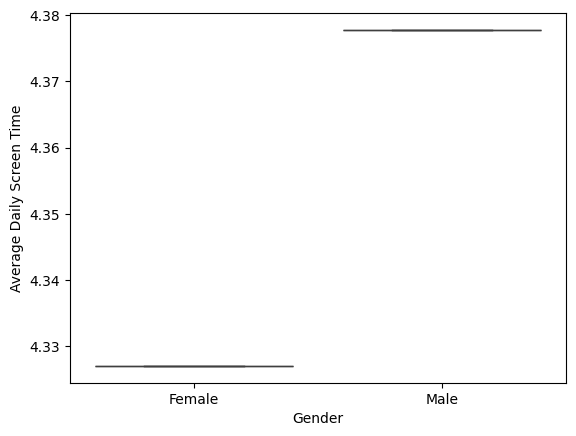

In [28]:
sns.boxplot(x=screentime_by_gender["Gender"],y=screentime_by_gender["Average Daily Screen Time"])
plt.show()

In [37]:
primary_device_usage=kids_data.value_counts("Primary_Device").reset_index(name="Usage Percentage")

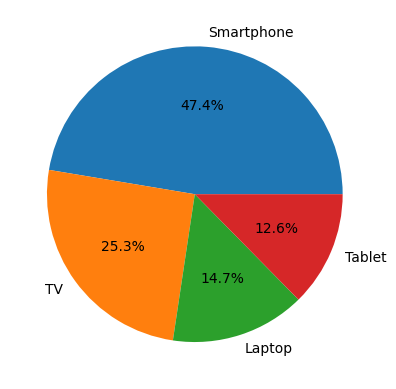

In [46]:
plt.pie(x=primary_device_usage["Usage Percentage"]//100,labels=primary_device_usage["Primary_Device"],autopct="%.1f%%")
plt.show()